## Point Model Lecture and Simulation
Aaron Nowack, UTK
April 20, 2023

### Purpose

The purpose of this notebook is to show how to derive the point model equations for the rates of detecting one, two, or three neutron coincidences in a neutron well counter. These are called neutron singles, doubles, and triples. 

Using only the neutron singles is 'neutron counting'.

Including the doubles is 'neutron coincidence counting'.

And lastly, including the triples is referred to as 'neutron multiplicity analysis'. 

There are several ways to derive the equations for singles, doubles, and triples.

One is by a time rate equation, relating the number of neutrons created and absorbed.

The second method is through considering each generation of fissions and collisions.

This presentation takes the second approach, however they can be shown to be equivalent.

### Equations of Neutron Singles, Doubles, and Triples

Equations are from [A Note on the Nomenclature in Neutron Multiplicity Mathematics](references/Shin_2019_A%20Note%20on%20the%20Nomenclature%20in%20Neutron%20Multiplicity.pdf) by Shin et. al, who uses the first approach.

![Image](images/pointmodel_sdt_equations_shin.png)

In this lecture we will be analyzing the number of neutrons emitted from a sample of plutonium undergoing spontaneous fission.

In [1]:
import numpy as np
import nuclear_data as nd
import simulate_chain as sc

import matplotlib.pyplot as plt

plt.rcParams.update({
    "font.family": "Arial",
    "font.size": 18,
    "xtick.labelsize": 13,
    "ytick.labelsize": 13,
    "legend.fontsize": 12
})

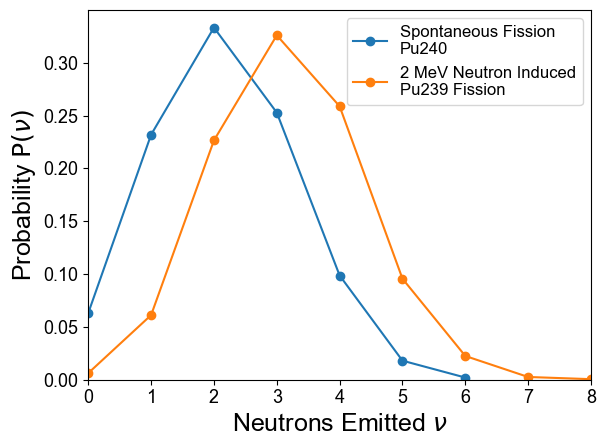

In [2]:
fig, ax = plt.subplots()

ax.plot(nd.pu240_spontaneous_fission_multiplicity, 'o-', label='Spontaneous Fission\nPu240')
ax.plot(nd.pu239_induced_fission_multiplicity_value[2], 'o-', label='2 MeV Neutron Induced\nPu239 Fission')

ax.set_xlabel(r"Neutrons Emitted $\nu$")
ax.set_ylabel(r"Probability $\mathrm{P}(\nu)$")
ax.set_xlim(0, 8)
ax.set_ylim(0) 
ax.legend()

fig.tight_layout()

## Fission Chain Simulation

- Start with one neutron in 'neutron bank'
- For each neutron in neutron bank
  - Give it a $p_F$ chance to fission and create $\nu$ neutrons with probability $P(\nu)$
    - If fission, add the $\nu$ fission neutrons to neutron bank
    - Else, add neutron to the 'escape' or 'leaked' bank
  - Repeat until no neutrons are in neutron bank

Total  Neutrons = 21
Leaked Neutrons = 15


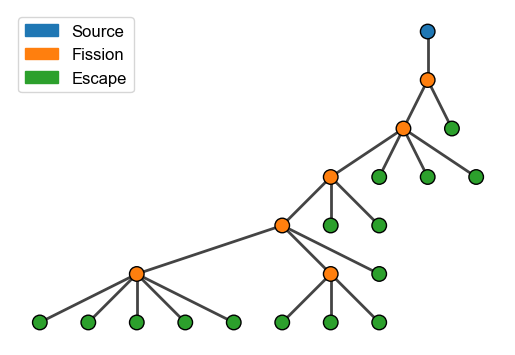

In [3]:
while True: # keep making chains until we have one that is larger than ...
    chain = sc.create_fission_chain_graph(pf=0.3, p_nu=nd.pu239_induced_fission_multiplicity_value[2])
    if len(chain.vs) > 10: # <-- this many events (fission + escape + source)
        break
    
sc.plot_fission_chain_graph(chain)

# total neutrons
neutrons_total = chain.ecount()
neutrons_leaked = sum([v['type'] == 'escape' for v in chain.vs])

print(f"Total  Neutrons = {neutrons_total}")
print(f"Leaked Neutrons = {neutrons_leaked}")

For power and weapons physics, the total number of neutrons created aka 'neutron population' is of interest.

For detection, the focus is on the number of escaped or leaked neutrons.

The statistics of the leaked neutron population can be used to determine properties of fissile material including
 - Enrichment or Fissile Mass
 - How close to critical the object is (neutron multiplication)
 - The relative rates of spontaneous fission and single neutron emitting ($\alpha$, n) reactions

## Some Definitions

Using Serber's 1945 document ["The Definition of Neutron Multiplication"](references/Serber_1945_The%20Definition%20of%20-Neutron%20Multiplication-_1.pdf).

> Total Multiplication, $\mathrm{M_T}$, is the "total number of neutrons produced in the active material when a single neutron in introduced as a source".

> Net or Leakage Multiplication, $\mathrm{M_L}$, is the number of neutrons which escape from the active material when a single neutron is introduced as the primary source.

Multiplication is most often used to described the average behavior of fission chains.

If, on average $n_F$ fissions are made in a chain, each producing $\nu_1$ fission neutrons,

$$ \mathrm{M_T} = 1 + n_F \nu_1 \\
\mathrm{M_L} = 1 + n_F \nu_1 - n_F
$$

Using the above, it can be shown that
$$
\frac{\mathrm{M_T} - 1}{\mathrm{M_L} - 1} = \frac{\nu_1 - 1}{\nu_1}
$$
---

Instead of expressing $\mathrm{M_T}$ and $\mathrm{M_L}$ using the average number of fissions, it's more convenient to formulate in terms of the average probability of any neutron to induce fission, $p_F$.

A definition of $\mathrm{M_T}$ using $p_F$ can be found by writing the average number of neutrons created after 1, 2, ... fissions.

For one neutron, with a probability $p_F$ of inducing fission and creating $\nu_1$ neutrons, the average number of total neutrons produced after one fission is (including the source neutron)
$$
\mathrm{M_T} = 1 + p_f \nu_1
$$
Now those $\nu_1$ neutrons each have a $p_F$ chance of creating a second fission, and creating $\nu_1$ more neutrons. Including the original neutrons, after two possible fissions the average total number of neutrons created is
$$
\mathrm{M_T} = 1 + p_f \nu_1 (1 + p_f \nu_1)
$$
And repeating for three possible fissions ...
$$
\mathrm{M_T} = 1 + p_f \nu_1 (1 + p_f \nu_1 (1 + p_f \nu_1))
$$


There is no limit to the number of fissions, just repeated iterations of each neutron creating $\nu_1$ more with $p_F$ probability,
$$
\mathrm{M_T} = 1 + p_f \nu_1 (1 + p_f \nu_1 (1 + p_f \nu_1(1 + p_f \nu_1 \cdots)))
$$
Expanding the right side yields a geometric series
$$
\mathrm{M_T} = 1 + p_F \nu_1 + (p_F \nu_1)^2 + (p_F \nu_1)^3 + \cdots
$$
which for $p_F \nu_1 < 1$ can be written as
$$\mathrm{M_T} = \frac{1}{1 - p_F \nu_1}$$

Using the previous relation of
$$
\frac{\mathrm{M_T} - 1}{\mathrm{M_L} - 1} = \frac{\nu_1 - 1}{\nu_1}
$$
$\mathrm{M_L}$ can be shown to be
$$
\mathrm{M_L} = \frac{1 - p_f}{1 - p_f \nu_1}
$$

## Simulating Many Chains

Starting with 10000 fission chains, starting with one neutron, using the induced pu239 we can tally how often we count 0, 1, 2 ... total and escaped neutrons for $p_F = 0.3$.

In [4]:
number_chains = 10000
total_neutrons, leaked_neutrons = sc.simulate(number_chains, nd.pu239_induced_fission_multiplicity_value[2], pf=0.3)

In [5]:
print(total_neutrons[:10])
print(leaked_neutrons[:10])

[   0. 7058.  109.  359.  324.  247.  152.  141.  119.   78.]
[  19. 7152.  373.  366.  310.  189.  155.  122.   77.   85.]


Text(0, 0.5, 'Occurrences')

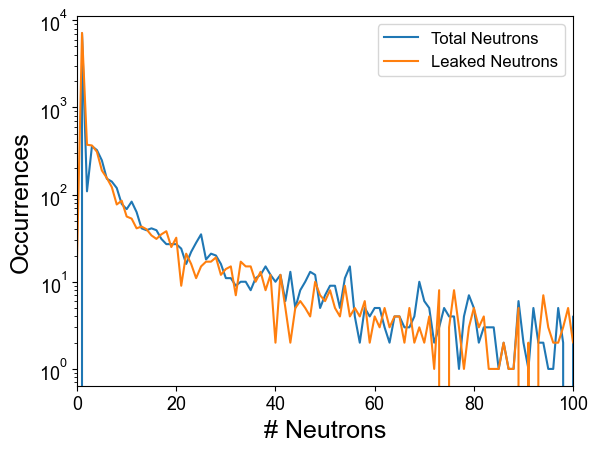

In [6]:
plt.plot(total_neutrons, label='Total Neutrons')
plt.plot(leaked_neutrons, label='Leaked Neutrons')
plt.yscale('log')
plt.xlim(0, 100)
plt.legend()
plt.xlabel('# Neutrons')
plt.ylabel('Occurrences')

Now increase statistics to 1000000 neutrons, and compare for $p_F = 0.2$ and $p_F = 0.3$.

In [7]:
number_chains = 1000000

total_neutrons_1, leaked_neutrons_1 = sc.simulate(number_chains, nd.pu239_induced_fission_multiplicity_value[2], pf=0.2)
total_pdist_1 = total_neutrons_1 / number_chains
leaked_pdist_1 = leaked_neutrons_1 / number_chains

total_neutrons_2, leaked_neutrons_2 = sc.simulate(number_chains, nd.pu239_induced_fission_multiplicity_value[2], pf=0.3)
total_pdist_2 = total_neutrons_2 / number_chains
leaked_pdist_2 = leaked_neutrons_2 / number_chains

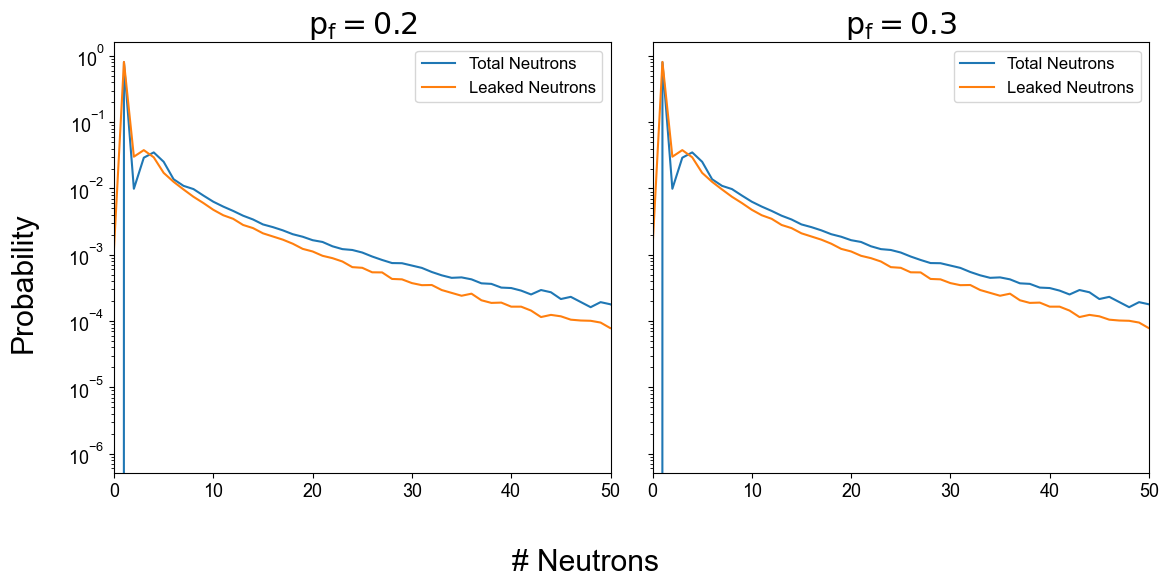

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
ax1.plot(total_pdist_1, label='Total Neutrons')
ax1.plot(leaked_pdist_1, label='Leaked Neutrons')
ax2.plot(total_pdist_1, label='Total Neutrons')
ax2.plot(leaked_pdist_1, label='Leaked Neutrons')
ax1.legend()
ax2.legend()
ax1.set_title(r"$\mathrm{p_f} = 0.2$")
ax2.set_title(r"$\mathrm{p_f} = 0.3$")

fig.supxlabel('# Neutrons')
fig.supylabel('Probability')
plt.yscale('log')
plt.xlim(0, 50)
plt.tight_layout()

## Calculating Multiplication

The average number of neutrons created ($n_T$) and leaked ($n_L$) is, using our definition, the total and leakage multiplication,
$$
\left< n_T \right> = \mathrm{M_T} = \frac{1}{1 - p_f \nu_1} \\
\left< n_L \right> = \mathrm{M_L} = \frac{1 - p_f}{1 - p_f \nu_1}
$$
and can be verified with the above simulation for $p_f = 0.3$

In [9]:
nu_1 = np.average(np.mgrid[0:len(nd.pu239_induced_fission_multiplicity_value[2])], weights=nd.pu239_induced_fission_multiplicity_value[2])

# p_f = 0.3
average_neutrons_total = np.average(np.mgrid[0:len(total_pdist_2)], weights=total_pdist_2)
average_neutrons_leaked = np.average(np.mgrid[0:len(leaked_pdist_2)], weights=leaked_pdist_2)

total_multiplication = 1.0 / (1 - 0.3 * nu_1)
leakage_multiplication = (1 - 0.3) * total_multiplication

print(f"Average Neutrons Total = {average_neutrons_total:.3f}")
print(f"Total Multiplication = {total_multiplication:.3f}")
print()
print(f"Average Neutrons Leaked = {average_neutrons_leaked:.3f}")
print(f"Leakage Multiplication = {leakage_multiplication:.3f}")

Average Neutrons Total = 19.478
Total Multiplication = 19.537

Average Neutrons Leaked = 13.742
Leakage Multiplication = 13.676


# Singles, Doubles, Triples

Want to know how often 1, 2, 3 leaked neutrons are emitted. Instead of using exact count probabilities, record the first three _combinatorial moments_, that way if 4 or more neutrons are emitted they still contribute to the statistics.

The $j$th combinatorial moment $\mathcal{M}_j$ measures the number of unique ways of counting $j$ items from $i$ total objects, where the number of $i$ objects follows the distribution $P(i)$.

$$
\mathcal{M}_j = \sum_{i} \binom{i}{j} P(i)
$$

The first three combinatorial moments are
$$
\begin{align}
\mathcal{M}_1 &= \sum_{i} \binom{i}{1} P(i) = \left< i \right>\\
\mathcal{M}_2 &= \sum_{i} \binom{i}{2} P(i) = \frac{1}{2} \left< i (i - 1) \right>\\
\mathcal{M}_3 &= \sum_{i} \binom{i}{3} P(i) = \frac{1}{6} \left< i (i - 1) (i - 2)\right>
\end{align}
$$

For i=6 objects, $\mathcal{M}_1 = 6$, $\mathcal{M}_2 = 16$, $\mathcal{M}_3 = 20$

For the moments of the leaked neutron population, we've already obtained the first moment for one starting neutron, $\mathcal{M}_1 = \mathrm{M_L}$. 

In general, for $Q$ number of starting neutrons or events, we will count $Q \mathcal{M}_1$ neutrons. In general, the (S)ingles, (D)oubles, and (T)riples are
$$
\mathrm{S} = Q ~ \mathcal{M}_1 \\
\mathrm{D} = Q ~ \mathcal{M}_2 \\
\mathrm{T} = Q ~ \mathcal{M}_3 \\
$$

Now for $i = $ # leaked neutrons ($n_L$), we can calculate $S, D, T$ for various values of $p_F$ where $Q = 100000$.

In [10]:
Q = 1000000
pf_trials = np.linspace(0, 0.25, 11)[1:]

s = np.zeros_like(pf_trials)
d = np.zeros_like(pf_trials)
t = np.zeros_like(pf_trials)

for i in range(len(pf_trials)):
    total_neutrons, leaked_neutrons = sc.simulate(Q, nd.pu239_induced_fission_multiplicity_value[2], pf=pf_trials[i])
    
    count = np.mgrid[0:len(leaked_neutrons)]
    
    for j in range(len(leaked_neutrons)):
        s[i] += j * leaked_neutrons[j]
        d[i] += (1 / 2.0) * j * (j - 1) * leaked_neutrons[j]
        t[i] += (1 / 6.0) * j * (j - 1) * (j - 2) * leaked_neutrons[j]

nu_1 = np.average(np.mgrid[0:len(nd.pu239_induced_fission_multiplicity_value[2])], weights=nd.pu239_induced_fission_multiplicity_value[2])

leakage_multiplication = (1 - pf_trials) / (1 - pf_trials * nu_1)

Text(0.5, 0.01, '$p_F$')

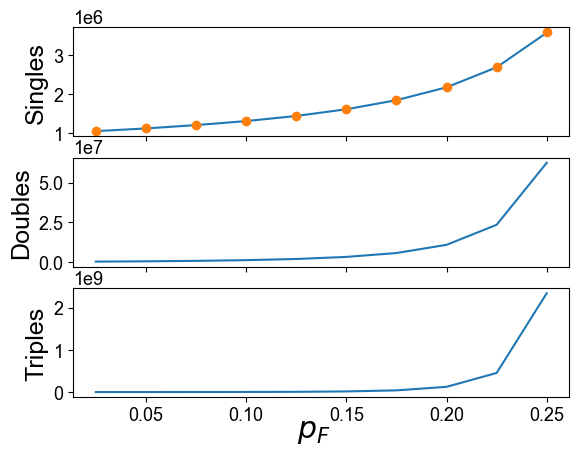

In [11]:
fig, axs = plt.subplots(3, 1, sharex=True)

axs[0].plot(pf_trials, s)
axs[1].plot(pf_trials, d)
axs[2].plot(pf_trials, t)

axs[0].plot(pf_trials, Q * leakage_multiplication, 'o')

axs[0].set_ylabel("Singles")
axs[1].set_ylabel("Doubles")
axs[2].set_ylabel("Triples")

fig.supxlabel(r"$p_F$")

And we see that the leakage multiplication times Q equals the simulated neutron singles. To obtain similar equations of doubles, it is possible to do a similar derivation to estimate $\left< n_L (n_L - 1) \right>$, but the derivation quickly gets complicated.

## Branching Processes and Probability Generating Functions

However by introducing _Probability Generating Functions_ (PGFs) we can write a PGF for the fission chain process, deriving the combinatorial moments only requires a few derivatives and the chain rule.

The fission chain is a type of _branching process_ or _multiplicative process_, which is a mathematical way of describing a population of individuals (neutrons) and their offspring given a model of reproduction (fission). Originally used by Sir Francis Galton and Reverend Watson to model the popularity of family names in 1874. Used to describe electrons in an amplifier, population dynamics in biology, gene mutations. Was further developed during the Manhattan Project by Ulam and Hawkins, then given a more formal analysis afterwards from the 1960s and onwards.

❗ Math Ahead ❗

### A _very_ short introduction to Probability Generating Functions

For a sequence $a_0, a_1, a_2, \dots$, the generating function of the sequence $G_a(s)$ is defined as,
$$
G_a(s) = \sum_{i = 0} a_i s^i
$$
A generating function $G_X(s)$ of a discrete probability mass function sequence $f_i$ is called a probability generating function with property
$$
G_X(s) = \sum_i f_i s^i = \sum_i s^i \Pr(X = i) = \mathbb{E}(s^X)
$$

Best illustrated with an example. The PGF for the number of one die after a single roll, is
$$
G_\textrm{dice}(s) = \frac{1}{6} s + \frac{1}{6} s^2 + \frac{1}{6} s^3 + \frac{1}{6} s^4 + \frac{1}{6} s^5 + \frac{1}{6} s^6
$$
$s$ is a latent variable, that is it's a dummy variable which lets us do various operations on the PGF. The outcome of the dice face to be $N$ is represented by each $s^N$ term, the coefficient of $1/6$ is the probability of that outcome occurring.

For counting the number of heads (X = 1) on a single coin flip with heads probability $p$ and tails probability $(1 - p)$, the PGF is
$$
G_\textrm{coin}(s) = (1 - p) s^0 + p s
$$

### Useful properties

For two random variables $X$ and $Y$, with PGFs $G_X(s)$, $G_Y(s)$, the PGF for the sum $S = X + Y$ is $G_S(s) = G_X(s) G_Y(s)$

For example, the sum of the dice faces of rolling two dice is
$$
G_\text{two dice}(s) = G_\text{dice}(s) G_\text{dice}(s) = \left( \frac{1}{6} s + \frac{1}{6} s^2 + \frac{1}{6} s^3 + \frac{1}{6} s^4 + \frac{1}{6} s^5 + \frac{1}{6} s^6 \right)^2 \\
G_\text{two dice}(s) = \frac{1}{36} s^2 + \frac{1}{18} s^3 + \cdots + \frac{1}{18} s^{11} + \frac{1}{36} s^{12}
$$

In general, if we have a random variable $X$ and $N$ with PGFs $G_X(s)$ and $G_N(s)$, and want to sum $X$ $N$ times, $S = X_1 + X_2 + \cdots X_N$

⚠ The PGF for $S$ is $G_S(s) = G_N( G_X(s) )$ ⚠

For example, rolling one dice with value $X$ and then rolling $X$ dice and adding their sides together yields
$$
G_\text{one then N dice} = G_\text{dice}(G_\text{dice}(s)) = \frac{1}{6} \left( \frac{1}{6} s + \frac{1}{6} s^2 + \frac{1}{6} s^3 + \frac{1}{6} s^4 + \frac{1}{6} s^5 + \frac{1}{6} s^6 \right) + \frac{1}{6} \left( \frac{1}{6} s + \frac{1}{6} s^2 + \frac{1}{6} s^3 + \frac{1}{6} s^4 + \frac{1}{6} s^5 + \frac{1}{6} s^6 \right)^2 + \cdots + \frac{1}{6} \left( \frac{1}{6} s + \frac{1}{6} s^2 + \frac{1}{6} s^3 + \frac{1}{6} s^4 + \frac{1}{6} s^5 + \frac{1}{6} s^6 \right)^6
$$

### Fission Chains and Bohnel Equation PGF Derivation

Treating a fission as rolling a dice, with individual side probabilities $P(\nu)$ of creating $\nu$ neutrons, the PGF $f(s)$ for the number of neutrons created in one fission is
$$
f(s) = P(\nu = 0) s^0 + P(\nu = 1) s^1 + P(\nu = 2) s^2 + \cdots \\
f(s) = \sum_i f_i s^i
$$
where $f_i = P(\nu = i)$

Now treat the possibility of one neutron creating $\nu$ fission neutrons with probability $p_f$, or escaping with probability $(1 - p_f)$. If for only one fission all neutrons escape, the PGF $h_1(s)$ for the number of escaped neutrons after one possible fission is a modified form of a coin flip and dice roll PGF,
$$
h_1(s) = (1 - p_F) s + p_F f(s)
$$

Now if instead of beginning with one neutron, we start with a fission, and then let those neutrons possibly fission once, the PGF $g_1(s)$ is
$$
g_1(s) = f(h_1(s))
$$

And next, supposing that this initial fission is initiated by one neutron with fission probability $p_F$, we have the PGF for two possible fissions
$$
h_2(s) = (1 - p_F) s + p_F f(h_1(s))
$$

We can continue this argument for $N$ possible fissions and write the PGF for the number of escaped neutrons after $N$ fissions
$$
h_N(s) = (1 - p_F) p_F f(h_{N-1}(s))
$$

In the limit of $N \rightarrow \infty$
$$
\lim_{N \to \infty} h_N(s) = \lim_{N \to \infty} h_{N-1}(s) = h(s)
$$
and the limit of the $N$th generation PGF is
$$
h(s) = (1 - p_F) s + p_F f(h(s))
$$
which is often referred to as the point model or Bohnel equation and describes the number of neutrons that escape a fission chain given $p_F$ and fission multiplicity distribution $f$.

🏁 Done with the math lecture 🏁

Now it's just a matter of calculating the neutron moments using $h(s)$ to derive the equation for S, D, T.

## Moments
The most important reason for using the PGF approach is the following ⏰

The combinatorial moments $\mathcal{M}_j$ can be calculated from a PGF $h(s)$ directly as
$$
\mathcal{M}_j = \frac{1}{j!} \left. \frac{d^j h(s)}{ds^j} \right|_{s = 1}
$$

Writing in another way, the first three combinatorial moments $\mathcal{M}_j$ for $j$ neutrons escaping a fission chain

$$
\begin{align}
\mathcal{M}_1 &= \left< i \right> = \left. \frac{d h(s)}{ds} \right|_{s = 1} \\
\mathcal{M}_2 &= \frac{1}{2} \left< i (i - 1) \right> = \frac{1}{2} \left. \frac{d^2 h(s)}{ds^2} \right|_{s = 1}\\
\mathcal{M}_3 &= \frac{1}{6} \left< i (i - 1) (i - 2)\right> = \frac{1}{3!} \left. \frac{d^3 h(s)}{ds^3} \right|_{s = 1}
\end{align}
$$

The $j$th derivative of a PGF $\phi_j$ is called the factorial moment,
$$
\phi_j = \left. \frac{d^j h(s)}{ds^j} \right|_{s = 1}
$$
and
$$
\mathcal{M}_j = \frac{1}{j!} \phi_j
$$

### Moments of Escaped Neutrons of a Fission Chain

Evaluating the first three derivatives for a single neutron initiated fission chain PGF $h(s)$ yields 😱
$$
\begin{align}
\frac{d h(s)}{ds} &= (1 - p_F) + p_F \frac{df(h(s))}{dh(s)} \frac{dh(s)}{ds} \\
\frac{d^2 h(s)}{ds^2} &= p_F \left( \frac{d^2 df(h(s))}{dh(s)^2 } \left( \frac{dh(s)}{ds} \right)^2 + \frac{df(h(s))}{dh(s)} \frac{d^2h(s)}{ds^2} \right) \\
\frac{d^3 h(s)}{ds^3} &= p_F \left( \frac{d^3 f(h(s))}{dh(s)^3 } \left( \frac{dh(s)}{ds} \right)^3 + 2 \frac{d^2 f(h(s))}{dh(s)^2 } \left( \frac{dh(s)}{ds} \right) \frac{d^2h(s)}{ds^2} + \frac{d^2 f(h(s))}{dh(s)^2} \left( \frac{dh(s)}{ds} \right) \frac{d^2h(s)}{ds^2} + \frac{df(h(s))}{dh(s)} \frac{d^3h(s)}{ds^3}\right)
\end{align}
$$

Note that
$$
\left. \frac{d^n f(h(s))}{d h(s)^n} \right|_{s = 1} = \left. \frac{d^n f(s)}{d s^n} \right|_{s = 1} = \nu_n
$$
Since $f(s)$ is known nuclear data of the induced neutron multiplicity distribution, the derivatives are known as well. The $n$th derivative of the multiplicity PGF $f(s)$ is written as $\nu_j$.

For 2 MeV neutron induced fission Pu239,

In [12]:
nu_1 = 0
nu_2 = 0
nu_3 = 0

for i, f_i in enumerate(nd.pu239_induced_fission_multiplicity_value[2]):
    nu_1 += i * f_i
    nu_2 += i * (i - 1) * f_i    
    nu_3 += i * (i - 1) * (i - 2) * f_i

print(f"nu_1 = {nu_1:.3f}")
print(f"nu_2 = {nu_2:.3f}")
print(f"nu_3 = {nu_3:.3f}")

nu_1 = 3.163
nu_2 = 8.239
nu_3 = 17.319


Evaluating both sides of the derivative equations at $s = 1$ and substituting for $\phi_1, \phi_2, \phi_3$ and $\nu_1, \nu_2, \nu_3$, the relations are

$$
\begin{align}
	\phi_1 &= 1 - p_f + p_f \nu_1 \phi_1 \\
	\phi_2 &= p_f (\nu_2 \phi_1^2 + \nu_1 \phi_2) \\
	\phi_3 &= p_f (\nu_3 \phi_1^3 + 3 \nu_2 \phi_1 \phi_2 + \nu_1 \phi_3 )
\end{align}
$$

which, when solved yield the explicit equations
$$
\begin{align}
	\phi_1 &= \frac{1 - p_f}{1 - p_f \nu_1} \\
	\phi_2 &= \left( \nu_2 \phi_1^2 \right) \left(\frac{p_f }{ 1 - \nu_1 p_f}\right)  = \frac{\nu_2 p_f (1 - p_f)^2}{(1 - \nu_1 p_f)^3}\\
		\phi_3 &= \left( \nu_3 \phi_1^3 + 3 \nu_2 \phi_1 \phi_2 \right) \left(\frac{p_f }{ 1 - \nu_1 p_f}\right) = \frac{p_f (1 - p_f)^3 (3 p_f \nu_2^2 + \nu_3 - p_f \nu_1 \nu_3)}{(1 - \nu_1 p_f)^5}
\end{align}
$$

which are often written in terms of $\mathbf{M_L}$ instead of $p_F$,

$$
\begin{align}
\mathbf{M_L} &= \frac{1-p_f}{1 - p_f \nu_1} \\
\phi_1 &= \mathbf{M_L} \\
\phi_2 &= \mathbf{M_L}^2 \left[ \nu_2 \left( \frac{\mathbf{M_L} - 1}{\nu_1 - 1} \right) \right] \\
\phi_3 &= \mathbf{M_L}^3 \left[ 3 \nu_2^2 \left( \frac{\mathbf{M_L} - 1}{\nu_1 - 1} \right)^2 + \nu_3 \left( \frac{\mathbf{M_L} - 1}{\nu_1 - 1} \right) \right] .
\end{align}
$$
👍

Now, finally we have explicit equations for the first three moments. Using the formulas for the singles doubles and triples
$$
\begin{align}
S &= Q \mathcal{M}_1 = Q \phi_1 \\
D &= Q \mathcal{M}_2 = Q \frac{1}{2} \phi_2 \\
T &= Q \mathcal{M}_3 = Q \frac{1}{6} \phi_3 \\
\end{align}
$$
we can finally compare to our earlier simulation results

Text(0.5, 0.01, '$p_F$')

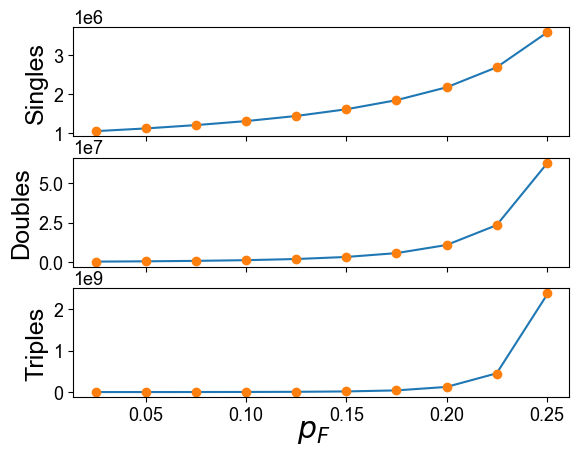

In [13]:
fig, axs = plt.subplots(3, 1, sharex=True)

axs[0].plot(pf_trials, s)
axs[1].plot(pf_trials, d)
axs[2].plot(pf_trials, t)

phi_1 = np.zeros_like(pf_trials)
phi_2 = np.zeros_like(pf_trials)
phi_3 = np.zeros_like(pf_trials)

for i, pf in enumerate(pf_trials):
    phi_1[i] = (1 - pf) / (1 - nu_1 * pf)
    phi_2[i] = nu_2 * pf * ((1 - pf) ** 2) / ((1 - nu_1 * pf) ** 3)
    phi_3[i] = pf * ((1 - pf) ** 3) * (3 * pf * (nu_2 ** 2) + nu_3 - pf * nu_1 * nu_3) / ((1 - nu_1 * pf) ** 5)

s_model = Q * phi_1
d_model = Q * (1 / 2) * phi_2
t_model = Q * (1 / 6) * phi_3

axs[0].plot(pf_trials, s_model, 'o')
axs[1].plot(pf_trials, d_model, 'o')
axs[2].plot(pf_trials, t_model, 'o')

axs[0].set_ylabel("Singles")
axs[1].set_ylabel("Doubles")
axs[2].set_ylabel("Triples")

fig.supxlabel(r"$p_F$")

🎯